# 1.Perform the necessary pre-processing.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/DeepLearning_Dataset/weatherAUS.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Handle missing values
data = data.dropna()

In [ ]:
# Convert categorical variables into numerical format
le = LabelEncoder()
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Normalize or standardize numerical features
scaler = StandardScaler()
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
# Split the dataset into training and test sets
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build an ANN model. Plot accuracy and loss for training and validation dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1411/1411 [==============================] - 12s 8ms/step - loss: 0.3460 - accuracy: 0.8480 - val_loss: 0.3235 - val_accuracy: 0.8608
Epoch 2/50
1411/1411 [==============================] - 9s 6ms/step - loss: 0.3091 - accuracy: 0.8654 - val_loss: 0.3138 - val_accuracy: 0.8672
Epoch 3/50
1411/1411 [==============================] - 11s 8ms/step - loss: 0.2862 - accuracy: 0.8754 - val_loss: 0.3151 - val_accuracy: 0.8664
Epoch 4/50
1411/1411 [==============================] - 11s 8ms/step - loss: 0.2612 - accuracy: 0.8861 - val_loss: 0.3153 - val_accuracy: 0.8677
Epoch 5/50
1411/1411 [==============================] - 8s 6ms/step - loss: 0.2407 - accuracy: 0.8945 - val_loss: 0.3196 - val_accuracy: 0.8686
Epoch 6/50
1411/1411 [==============================] - 11s 8ms/step - loss: 0.2252 - accuracy: 0.9046 - val_loss: 0.3329 - val_accuracy: 0.8657
Epoch 7/50
1411/1411 [==============================] - 9s 7ms/step - loss: 0.2072 - accuracy: 0.9117 - val_loss: 0.3494 - val_accur

In [ ]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

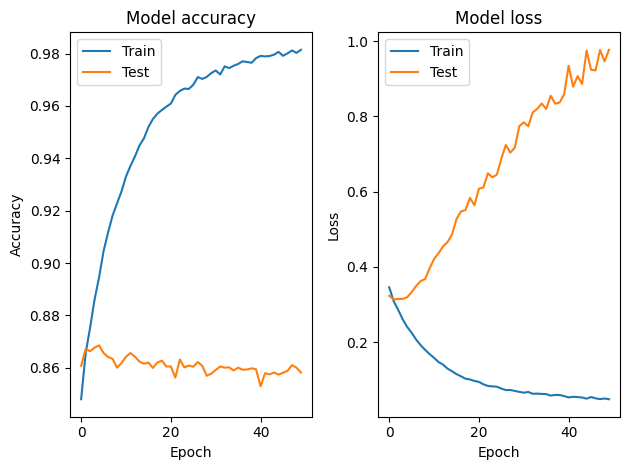

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# 3. Implement two regularization techniques and analyze the performance before and after regularization

Two common regularization techniques are Dropout and L1/L2 regularization.

Dropout:
This randomly drops a fraction of the input units to 0 at each update during training, which helps prevent overfitting.

L1/L2 regularization:
These add a penalty to the loss function for large values of model parameters. L1 regularization leads to sparsity, while L2 regularization leads to smaller weights.

In [ ]:
# Using Dropout and L2 regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
1411/1411 [==============================] - 14s 10ms/step - loss: 0.3833 - accuracy: 0.8482 - val_loss: 0.3536 - val_accuracy: 0.8593
Epoch 2/50
1411/1411 [==============================] - 12s 8ms/step - loss: 0.3556 - accuracy: 0.8570 - val_loss: 0.3487 - val_accuracy: 0.8611
Epoch 3/50
1411/1411 [==============================] - 8s 6ms/step - loss: 0.3527 - accuracy: 0.8572 - val_loss: 0.3474 - val_accuracy: 0.8602
Epoch 4/50
1411/1411 [==============================] - 11s 7ms/step - loss: 0.3517 - accuracy: 0.8578 - val_loss: 0.3455 - val_accuracy: 0.8615
Epoch 5/50
1411/1411 [==============================] - 10s 7ms/step - loss: 0.3503 - accuracy: 0.8582 - val_loss: 0.3472 - val_accuracy: 0.8610
Epoch 6/50
1411/1411 [==============================] - 9s 6ms/step - loss: 0.3497 - accuracy: 0.8588 - val_loss: 0.3465 - val_accuracy: 0.8618
Epoch 7/50
1411/1411 [==============================] - 11s 8ms/step - loss: 0.3509 - accuracy: 0.8578 - val_loss: 0.3465 - val_acc

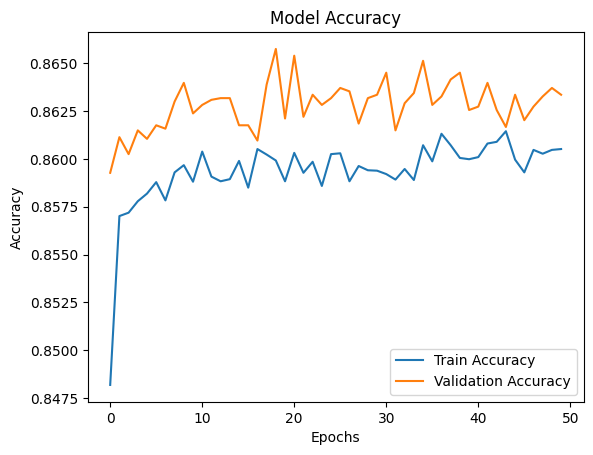

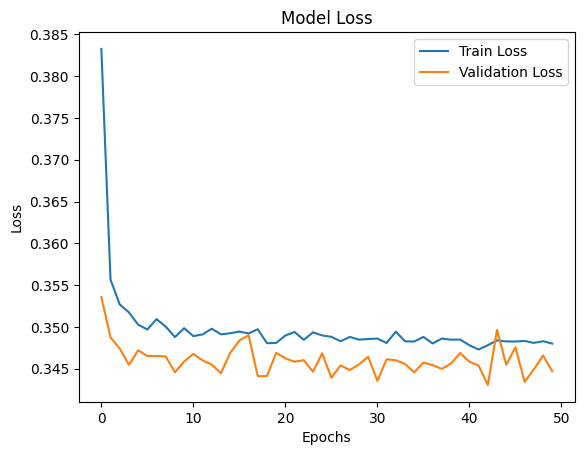

In [ ]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


353/353 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8633
Test Accuracy: 86.33%


# INTERPRETATION:
* With the introduction of regularization,the training and validation accuracies are closer, which suggests the regularization techniques helped mitigate overfitting.
* The test accuracy is 86.33%, which is slightly better than the validation accuracy, indicating that the model generalizes well to unseen data.
* L2 regularization has introduced a penalty on large weights, which has made the model's parameters more conservative, preventing them from fitting too closely to the noise in the training data.


# 4. For the chosen dataset, build a CNN model with at least 80% accuracy.

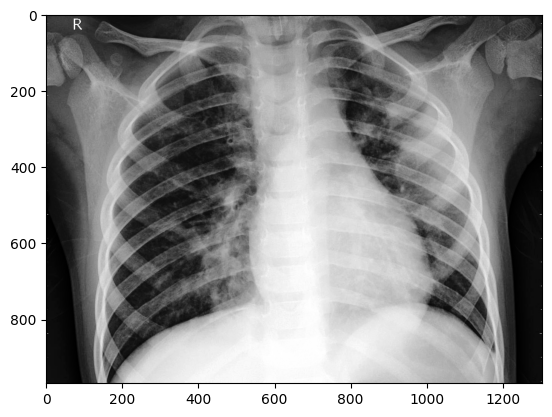

In [8]:
import matplotlib.pyplot as plt
img = plt.imread("/content/drive/MyDrive/DeepLearning_Dataset/Covid19-dataset/test/Viral Pneumonia/0101.jpeg")
plt.imshow(img)
plt.show()

In [9]:
pip install split-folders

In [10]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/DeepLearning_Dataset/Covid19-dataset/test",output = "output",seed = 1337,ratio = (.8, .2))

Copying files: 66 files [00:00, 179.56 files/s]


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# all images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale = 1./255,)
test_data = ImageDataGenerator(rescale = 1./255)
train_generator =train_data.flow_from_directory(
    "/content/drive/MyDrive/DeepLearning_Dataset/Covid19-dataset/train",
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'categorical')
validation_generator = test_data.flow_from_directory(
    "/content/drive/MyDrive/DeepLearning_Dataset/Covid19-dataset/test",
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'categorical')

Found 261 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [13]:
num_classes = 3
input_shape = (224,224,3)

In [14]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(input_shape)), #input layer
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'), # 16 is no of filters , filter size is 3*3
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'), # 1 st hidden layer has 128 neurons
    layers.Dense(256,activation = 'relu'), # 2 nd hidden layer has 256 neurons
    layers.Dense(256,activation = 'relu'), # 3 rd hidden layer has 256 neurons
    layers.Dense(num_classes,activation = 'softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [17]:
model.compile(optimizer ='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [18]:
epochs = 10
history1 = model.fit(
    train_generator ,
    validation_data = validation_generator,
    epochs = epochs
)

Epoch 1/10
14/14 [==============================] - 23s 2s/step - loss: 1.0955 - accuracy: 0.4559 - val_loss: 1.0947 - val_accuracy: 0.3939
Epoch 2/10
14/14 [==============================] - 21s 1s/step - loss: 1.0853 - accuracy: 0.4559 - val_loss: 1.0913 - val_accuracy: 0.3939
Epoch 3/10
14/14 [==============================] - 21s 2s/step - loss: 1.0754 - accuracy: 0.4559 - val_loss: 1.1059 - val_accuracy: 0.3939
Epoch 4/10
14/14 [==============================] - 21s 1s/step - loss: 1.0738 - accuracy: 0.4559 - val_loss: 1.1151 - val_accuracy: 0.3939
Epoch 5/10
14/14 [==============================] - 22s 1s/step - loss: 1.0718 - accuracy: 0.4559 - val_loss: 1.0909 - val_accuracy: 0.3939
Epoch 6/10
14/14 [==============================] - 28s 2s/step - loss: 1.0724 - accuracy: 0.4559 - val_loss: 1.0935 - val_accuracy: 0.3939
Epoch 7/10
14/14 [==============================] - 20s 1s/step - loss: 1.0695 - accuracy: 0.4559 - val_loss: 1.1045 - val_accuracy: 0.3939
Epoch 8/10
14/14 [==

# 5. Now include 5 data augmentation techniques appropriate to your dataset and build CNN on augmented images.


In [19]:
 #image generator is to augment the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# all images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,)
test_data = ImageDataGenerator(rescale = 1./255)
train_generator =train_data.flow_from_directory(
    "/content/drive/MyDrive/DeepLearning_Dataset/Covid19-dataset/train",
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'categorical')
validation_generator = test_data.flow_from_directory(
    "/content/drive/MyDrive/DeepLearning_Dataset/Covid19-dataset/test",
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'categorical')

Found 261 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [20]:
num_classes = 3
input_shape = (224,224,3)

In [21]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(input_shape)), #input layer
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'), # 16 is no of filters , filter size is 3*3
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same',activation = 'relu'), # padding = 'same', input size = output size of an image
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'), # 1 st hidden layer has 128 neurons
    layers.Dense(256,activation = 'relu'), # 2 nd hidden layer has 256 neurons
    layers.Dense(256,activation = 'relu'), # 3 rd hidden layer has 256 neurons
    layers.Dense(num_classes,activation = 'softmax')
])

In [22]:
model.compile(optimizer ='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [23]:
epochs = 10
history2 = model.fit(
    train_generator ,
    validation_data = validation_generator,
    epochs = epochs
)

Epoch 1/10
14/14 [==============================] - 32s 2s/step - loss: 1.0945 - accuracy: 0.4023 - val_loss: 1.0914 - val_accuracy: 0.3939
Epoch 2/10
14/14 [==============================] - 31s 2s/step - loss: 1.0735 - accuracy: 0.4559 - val_loss: 1.0934 - val_accuracy: 0.3939
Epoch 3/10
14/14 [==============================] - 36s 3s/step - loss: 1.0798 - accuracy: 0.4559 - val_loss: 1.0919 - val_accuracy: 0.3939
Epoch 4/10
14/14 [==============================] - 31s 2s/step - loss: 1.0801 - accuracy: 0.4559 - val_loss: 1.0907 - val_accuracy: 0.3939
Epoch 5/10
14/14 [==============================] - 25s 2s/step - loss: 1.0747 - accuracy: 0.4559 - val_loss: 1.0951 - val_accuracy: 0.3939
Epoch 6/10
14/14 [==============================] - 26s 2s/step - loss: 1.0687 - accuracy: 0.4559 - val_loss: 1.0976 - val_accuracy: 0.3939
Epoch 7/10
14/14 [==============================] - 28s 2s/step - loss: 1.0696 - accuracy: 0.4559 - val_loss: 1.1277 - val_accuracy: 0.3939
Epoch 8/10
14/14 [==

# 6. Compare the performance of above two models

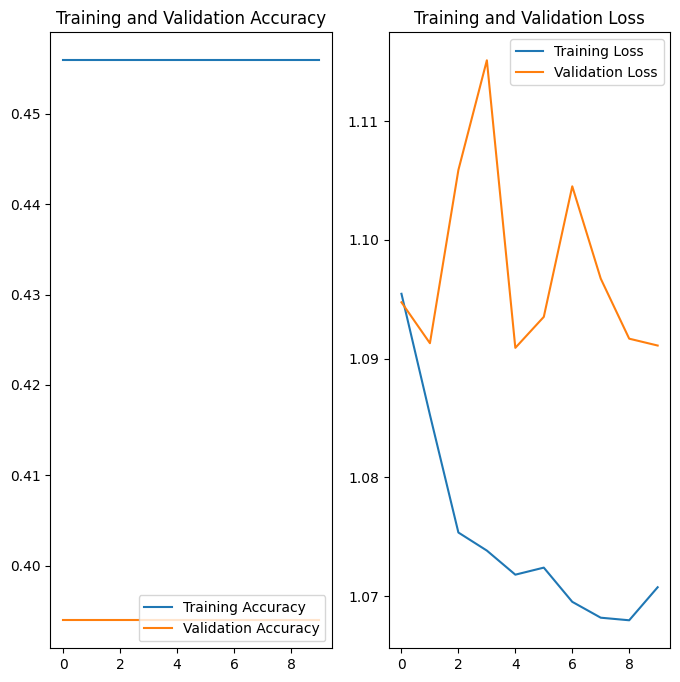

In [24]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

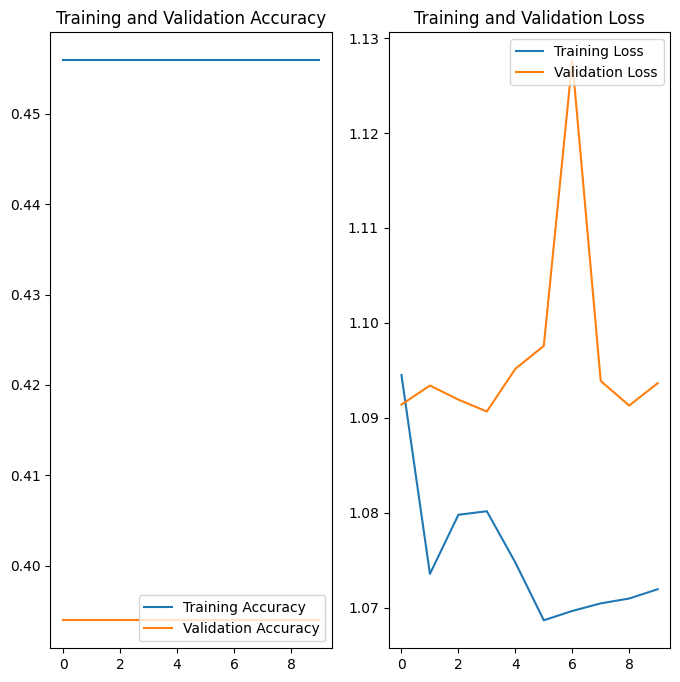

In [25]:
acc_1 = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 7. Choose a pre-trained model and implement from scratch on the chosen dataset

In [26]:
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, ReLU, BatchNormalization, add,Softmax, AveragePooling2D, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [27]:
def expansion_block(x,t,filters,block_id):
    prefix = 'block_{}_'.format(block_id)
    total_filters = t*filters
    x = Conv2D(total_filters,1,padding='same',use_bias=False, name = prefix +'expand')(x)
    x = BatchNormalization(name=prefix +'expand_bn')(x)
    x = ReLU(6,name = prefix +'expand_relu')(x)
    return x

def depthwise_block(x,stride,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = DepthwiseConv2D(3,strides=(stride,stride),padding ='same', use_bias = False, name = prefix + 'depthwise_conv')(x)
    x = BatchNormalization(name=prefix +'dw_bn')(x)
    x = ReLU(6,name=prefix +'dw_relu')(x)
    return x

def projection_block(x,out_channels,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = Conv2D(filters = out_channels,kernel_size = 1,padding='same',use_bias=False,name= prefix + 'compress')(x)
    x = BatchNormalization(name=prefix +'compress_bn')(x)
    return x

In [28]:
def Bottleneck(x,t,filters, out_channels,stride,block_id):
    y = expansion_block(x,t,filters,block_id)
    y = depthwise_block(y,stride,block_id)
    y = projection_block(y, out_channels,block_id)
    if y.shape[-1]==x.shape[-1]:
        y = add([x,y])
    return y

In [29]:
def MobileNetV2(input_image = (224,224,3), n_classes=3):
    input = Input (input_shape)
    x = Conv2D(32,3,strides=(2,2),padding='same', use_bias=False)(input)
    x = BatchNormalization(name='conv1_bn')(x)
    x = ReLU(6, name='conv1_relu')(x)
    # 17 Bottlenecks
    x = depthwise_block(x,stride=1,block_id=1)
    x = projection_block(x, out_channels=16,block_id=1)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 2,block_id = 2)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 1,block_id = 3)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 2,block_id = 4)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 5)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 6)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 2,block_id = 7)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 8)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 9)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 10)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 11)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 12)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 13)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 2,block_id = 14)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 15)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 16)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 320, stride = 1,block_id = 17)
    x = Conv2D(filters = 1280,kernel_size = 1,padding='same',use_bias=False, name = 'last_conv')(x)
    x = BatchNormalization(name='last_bn')(x)
    x = ReLU(6,name='last_relu')(x)
    x = GlobalAveragePooling2D()(x)
    output = Dense(3,activation='softmax')(x)
    model = Model(input, output)
    return model

In [30]:
n_classes = 3
input_shape = (224,224,3)
model = MobileNetV2(input_shape,n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv2d_9[0][0]']            
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['conv1_bn[0][0]']        

In [31]:
import tensorflow as tf
model.compile(optimizer ='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])


In [32]:
epoch = 10
history3 = model.fit(
    train_generator ,
    validation_data = validation_generator,
    epochs = epoch)

Epoch 1/10
14/14 [==============================] - 76s 4s/step - loss: 0.9655 - accuracy: 0.6284 - val_loss: 1.1445 - val_accuracy: 0.3939
Epoch 2/10
14/14 [==============================] - 57s 4s/step - loss: 0.9883 - accuracy: 0.6475 - val_loss: 1.3178 - val_accuracy: 0.3939
Epoch 3/10
14/14 [==============================] - 60s 4s/step - loss: 0.6884 - accuracy: 0.6973 - val_loss: 1.6317 - val_accuracy: 0.3939
Epoch 4/10
14/14 [==============================] - 55s 4s/step - loss: 0.7077 - accuracy: 0.7318 - val_loss: 1.7668 - val_accuracy: 0.3939
Epoch 5/10
14/14 [==============================] - 57s 4s/step - loss: 0.5809 - accuracy: 0.7510 - val_loss: 2.4045 - val_accuracy: 0.3939
Epoch 6/10
14/14 [==============================] - 54s 4s/step - loss: 0.5285 - accuracy: 0.7663 - val_loss: 2.8537 - val_accuracy: 0.3939
Epoch 7/10
14/14 [==============================] - 62s 4s/step - loss: 0.5097 - accuracy: 0.7893 - val_loss: 3.4363 - val_accuracy: 0.3939
Epoch 8/10
14/14 [==

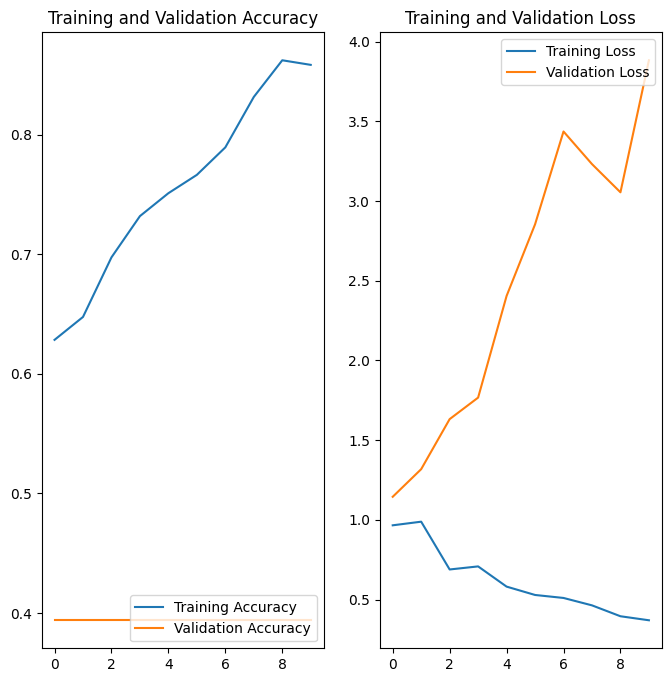

In [33]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 8. Choose a pre-trained model and implement as transfer learning on the chosen dataset

In [34]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [35]:
Model_V2 = MobileNetV2(weights='imagenet',include_top = False, input_shape = (224,224,3))

9406464/9406464 [==============================] - 0s 0us/step


In [36]:
x = Model_V2.output
x = GlobalAveragePooling2D()(x)
output = Dense(units = 3, activation='softmax')(x)

In [37]:
# The last 15 layers fine tune
for layer in Model_V2.layers[:15]:
    layer.trainable = False

In [38]:
model = Model(inputs=Model_V2.input, outputs=output)

In [39]:
model.compile(optimizer ='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [40]:
epochs = 10
history4 = model.fit(
    train_generator ,
    validation_data = validation_generator,
    epochs = epochs
)

Epoch 1/10
14/14 [==============================] - 65s 4s/step - loss: 0.5906 - accuracy: 0.7778 - val_loss: 3.9056 - val_accuracy: 0.6667
Epoch 2/10
14/14 [==============================] - 51s 4s/step - loss: 0.4469 - accuracy: 0.8276 - val_loss: 14.3271 - val_accuracy: 0.3030
Epoch 3/10
14/14 [==============================] - 48s 3s/step - loss: 0.3002 - accuracy: 0.8966 - val_loss: 6.8390 - val_accuracy: 0.3788
Epoch 4/10
14/14 [==============================] - 48s 3s/step - loss: 0.2238 - accuracy: 0.9272 - val_loss: 2.8853 - val_accuracy: 0.5000
Epoch 5/10
14/14 [==============================] - 48s 3s/step - loss: 0.3481 - accuracy: 0.8966 - val_loss: 6.2693 - val_accuracy: 0.3182
Epoch 6/10
14/14 [==============================] - 45s 3s/step - loss: 0.3089 - accuracy: 0.9195 - val_loss: 2.8205 - val_accuracy: 0.4242
Epoch 7/10
14/14 [==============================] - 45s 3s/step - loss: 0.2282 - accuracy: 0.9195 - val_loss: 1.3171 - val_accuracy: 0.6364
Epoch 8/10
14/14 [=

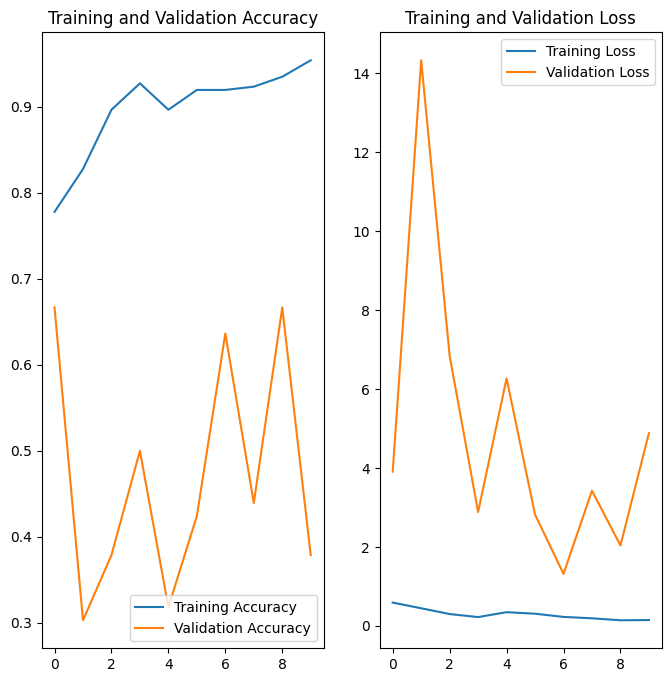

In [41]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()